<div style="padding:25px;color:white;margin:0;font-size:250%;text-align:center;display:fill;border-radius:10px;background-color:#298f50;overflow:hidden;font-weight:500;font-family:magra">1) Library import & Dataset </div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from datetime import datetime
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans,AgglomerativeClustering


import warnings
warnings.filterwarnings('ignore') 

In [2]:
data=pd.read_csv('marketing_campaign.csv',sep='\t')
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


# Features:


______________________________________________________________________________________________________________
### People

* ID: Customer's unique identifier  
* Year_Birth: Customer's birth year  
* Education: Customer's education level  
* Marital_Status: Customer's marital status  
* Income: Customer's yearly household income  
* Kidhome: Number of children in customer's household  
* Teenhome: Number of teenagers in customer's household  
* Dt_Customer: Date of customer's enrollment with the company  
* Recency: Number of days since customer's last purchase  
* Complain: 1 if the customer complained in the last 2 years, 0 otherwise  

### Products

* MntWines: Amount spent on wine in last 2 years
* MntFruits: Amount spent on fruits in last 2 years
* MntMeatProducts: Amount spent on meat in last 2 years
* MntFishProducts: Amount spent on fish in last 2 years
* MntSweetProducts: Amount spent on sweets in last 2 years
* MntGoldProds: Amount spent on gold in last 2 years

### Promotion

* NumDealsPurchases: Number of purchases made with a discount
* AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
* AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
* AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
* AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
* AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
* Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

### Place

* NumWebPurchases: Number of purchases made through the company’s website
* NumCatalogPurchases: Number of purchases made using a catalogue
* NumStorePurchases: Number of purchases made directly in stores
* NumWebVisitsMonth: Number of visits to company’s website in the last month
______________________________________________________________________________________________________________


In [3]:
data.shape

(2240, 29)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

<div style="padding:25px;color:white;margin:0;font-size:250%;text-align:center;display:fill;border-radius:10px;background-color:#298f50;overflow:hidden;font-weight:500;font-family:magra">2) Feature generation  </div>

In [5]:
data['Age']=datetime.now().year-data['Year_Birth']

In [6]:
def get_different_year():
    registration_year = pd.to_datetime(data['Dt_Customer'], format='%d-%m-%Y').apply(lambda x: x.year)
    current_year = datetime.now().year
    return current_year - registration_year

data['Years_Since_Registration'] = get_different_year()  # Number of years since customer registration

In [7]:
data["Education"] = data["Education"].map({"Basic": 0, "Graduation": 1, "2n Cycle": 2, "Master": 2, "PhD": 3})
# Encoded in numbers in order

In [8]:
data['Marital_Status'] = data["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone",
    "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone"})

data['Martial_Status'] = data['Marital_Status'].map({'Alone': 1, 'Partner': 2})


data["Family_Size"] = data['Martial_Status'].astype(int) + data['Kidhome'] + data['Teenhome'] 

In [9]:
mnt_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
data['Total_spend_on_product'] = data[mnt_cols].sum(axis=1)  # Total amount spent on products

In [10]:
accepted_cmp_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
                     'Response']
data['Num_Accepted_Cmp'] = data[accepted_cmp_cols].sum(axis=1)  
# Number of companies in which the client accepted the offer

In [11]:
total_purchases = ['NumWebPurchases','NumDealsPurchases','NumCatalogPurchases', 'NumStorePurchases']
data['Num_Total_Purchases'] = data[total_purchases].sum(axis=1)  # Total number of purchases

In [12]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Z_CostContact,Z_Revenue,Response,Age,Years_Since_Registration,Martial_Status,Family_Size,Total_spend_on_product,Num_Accepted_Cmp,Num_Total_Purchases
0,5524,1957,1,Alone,58138.0,0,0,04-09-2012,58,635,...,3,11,1,66,11,1,1,1617,1,25
1,2174,1954,1,Alone,46344.0,1,1,08-03-2014,38,11,...,3,11,0,69,9,1,3,27,0,6
2,4141,1965,1,Partner,71613.0,0,0,21-08-2013,26,426,...,3,11,0,58,10,2,2,776,0,21
3,6182,1984,1,Partner,26646.0,1,0,10-02-2014,26,11,...,3,11,0,39,9,2,3,53,0,8
4,5324,1981,3,Partner,58293.0,1,0,19-01-2014,94,173,...,3,11,0,42,9,2,3,422,0,19


## EDA

### correlation matrix

In [13]:
to_corr = ['Age', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'Complain','Education', 
          'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 
          'MntGoldProds', 'NumDealsPurchases', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 
          'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'NumWebPurchases', 'NumCatalogPurchases', 
          'NumStorePurchases', 'NumWebVisitsMonth', 'Years_Since_Registration', 'Family_Size',
           'Total_spend_on_product', 'Num_Accepted_Cmp', 'Num_Total_Purchases']

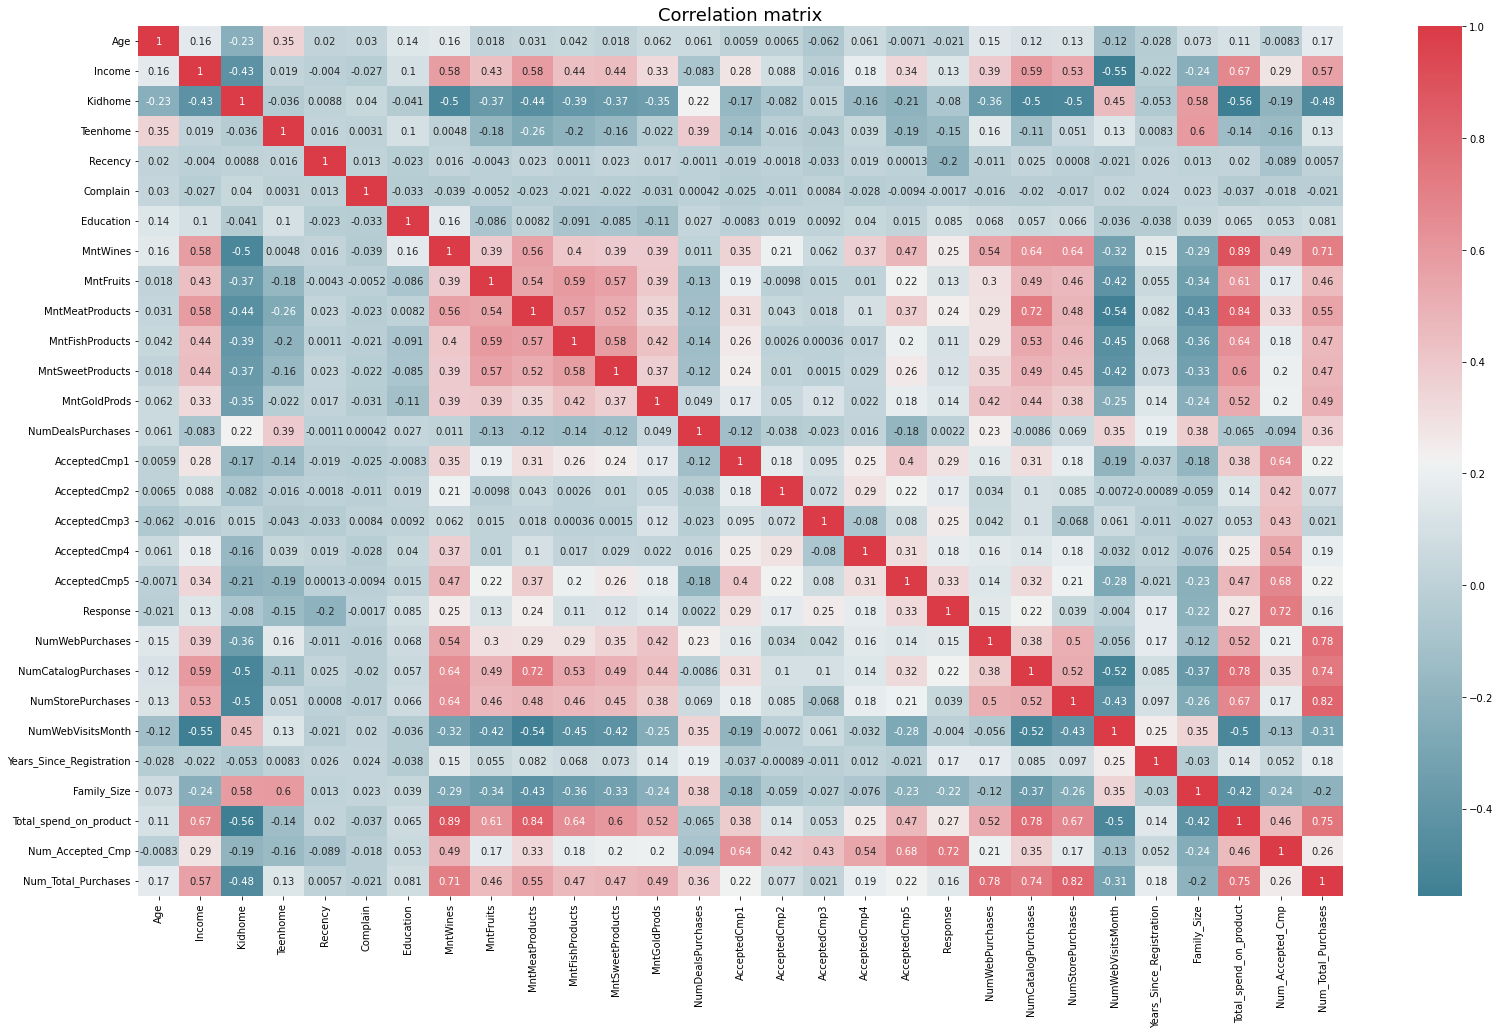

In [14]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
plt.figure(figsize=(27,16))
plt.title('Correlation matrix', fontsize=18)
sns.heatmap(data[to_corr].corr(),cmap=cmap,annot=True)
plt.show()

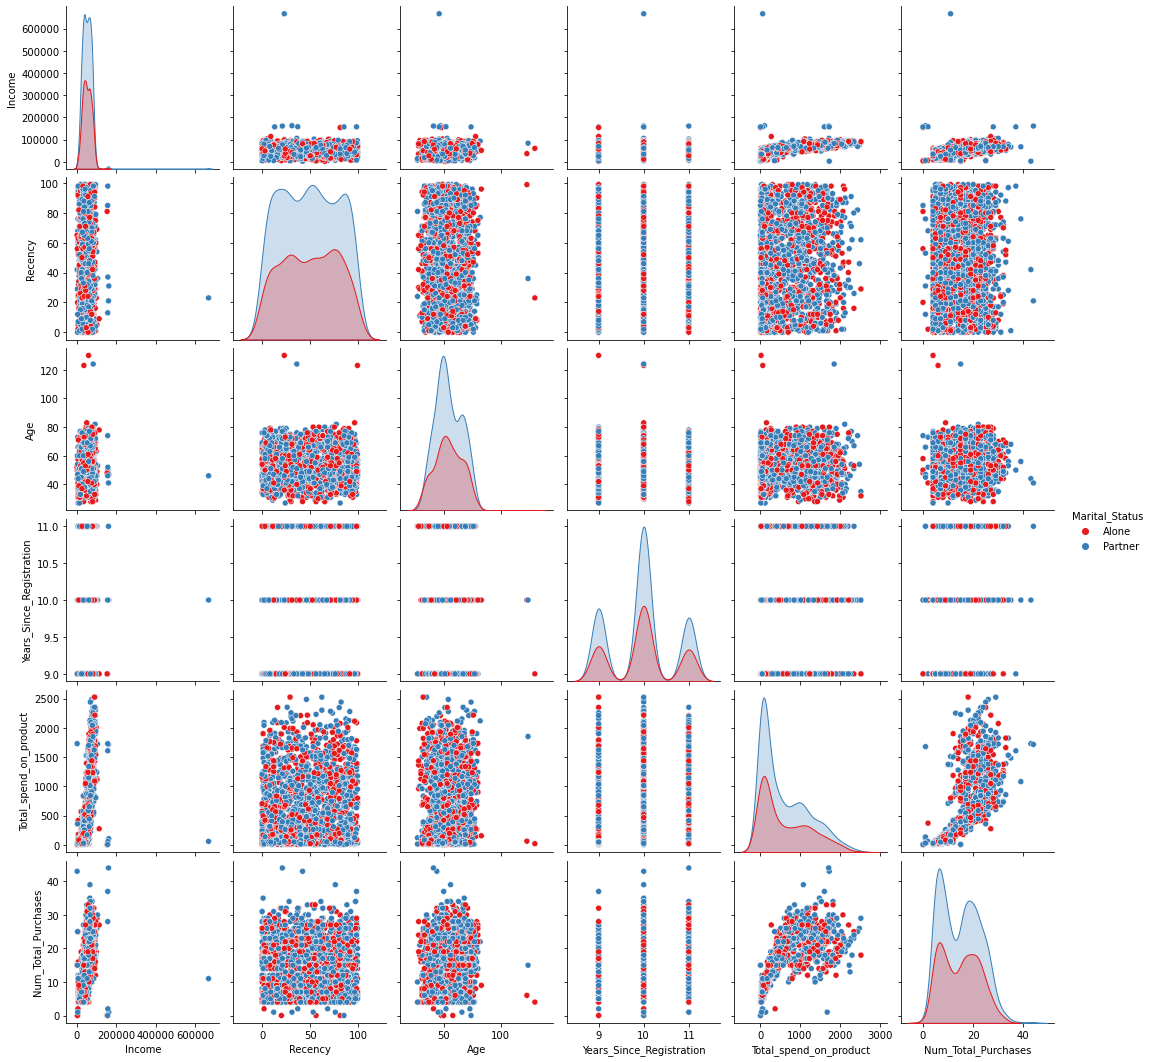

In [15]:
to_plot = ['Income', 'Recency', 'Age', 'Years_Since_Registration', 'Total_spend_on_product',
           'Num_Total_Purchases', 'Marital_Status']
sns.pairplot(data[to_plot], hue='Marital_Status', palette='Set1')
plt.show()

In [16]:
data[['Education', 'Marital_Status', 'Income', 'Recency', 'Age', 'Martial_Status',
       'Family_Size', 'Total_spend_on_product', 'Num_Accepted_Cmp', 'Num_Total_Purchases']]

,Education,Marital_Status,Income,Recency,Age,Martial_Status,Family_Size,Total_spend_on_product,Num_Accepted_Cmp,Num_Total_Purchases
0,1,Alone,58138.0,58,66,1,1,1617,1,25
1,1,Alone,46344.0,38,69,1,3,27,0,6
2,1,Partner,71613.0,26,58,2,2,776,0,21
3,1,Partner,26646.0,26,39,2,3,53,0,8
4,3,Partner,58293.0,94,42,2,3,422,0,19
...,...,...,...,...,...,...,...,...,...,...
2235,1,Partner,61223.0,46,56,2,3,1341,0,18
2236,3,Partner,64014.0,56,77,2,5,444,1,22
2237,1,Alone,56981.0,91,42,1,1,1241,1,19
2238,2,Partner,69245.0,8,67,2,3,843,0,23


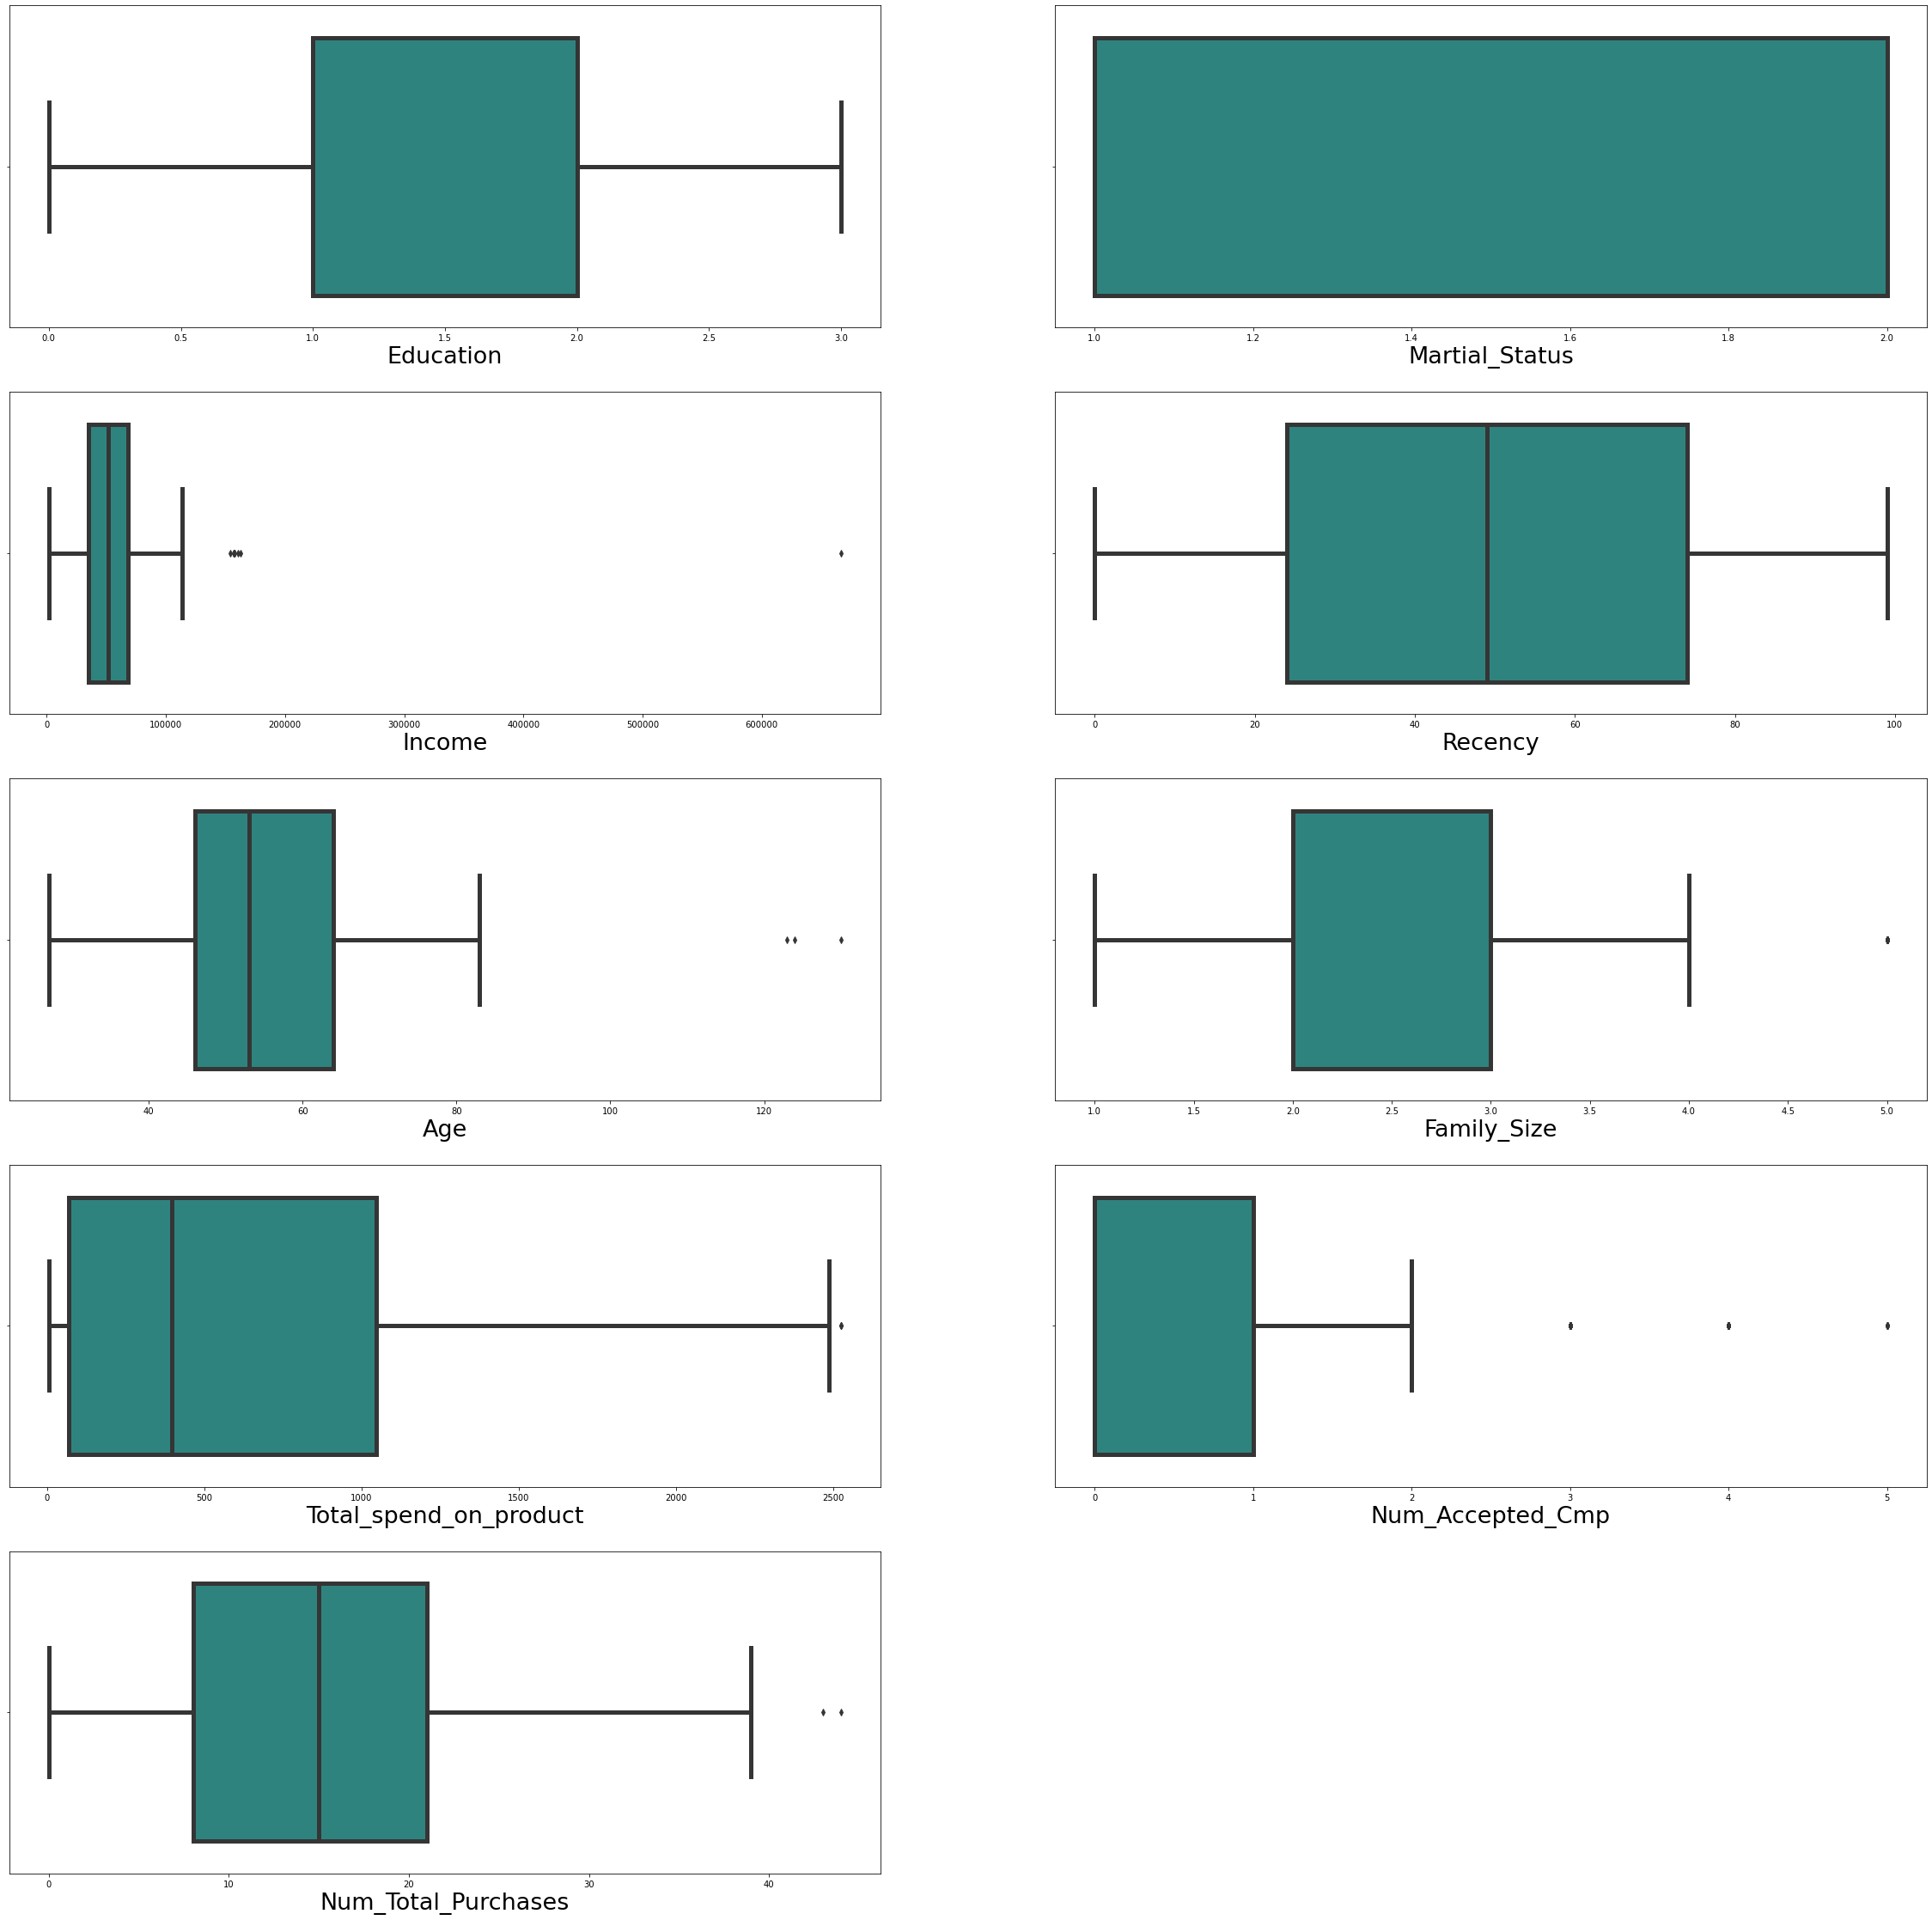

In [17]:
to_outliers=['Education', 'Martial_Status','Income', 'Recency', 'Age',
       'Family_Size', 'Total_spend_on_product', 'Num_Accepted_Cmp', 'Num_Total_Purchases']
plt.figure(figsize=(40,40))
for i,col in enumerate(to_outliers):
    plt.subplot(5,2,i+1)
    sns.boxplot(data[col],palette='viridis',linewidth=5)
    plt.xlabel(col,fontdict={'size':27})
    
    

<div style="padding:25px;color:white;margin:0;font-size:250%;text-align:center;display:fill;border-radius:10px;background-color:#298f50;overflow:hidden;font-weight:500;font-family:magra">3) Data cleaning </div>

In [18]:
data.isna().sum()

ID                           0
Year_Birth                   0
Education                    0
Marital_Status               0
Income                      24
Kidhome                      0
Teenhome                     0
Dt_Customer                  0
Recency                      0
MntWines                     0
MntFruits                    0
MntMeatProducts              0
MntFishProducts              0
MntSweetProducts             0
MntGoldProds                 0
NumDealsPurchases            0
NumWebPurchases              0
NumCatalogPurchases          0
NumStorePurchases            0
NumWebVisitsMonth            0
AcceptedCmp3                 0
AcceptedCmp4                 0
AcceptedCmp5                 0
AcceptedCmp1                 0
AcceptedCmp2                 0
Complain                     0
Z_CostContact                0
Z_Revenue                    0
Response                     0
Age                          0
Years_Since_Registration     0
Martial_Status               0
Family_S

In [19]:
data.dropna(inplace=True)

### Outliers removing

In [20]:
def remove_outliers(df,column):
    q1 = np.percentile(df[column],25)
    q3=np.percentile(df[column],75)
    iqr = q3 - q1
    upper_bound = q3 + 1.5 * iqr
    lower_bound = q1 - 1.5 * iqr
    df = df[(df[column] > lower_bound) & (df[column] < upper_bound)]

    return df

data=remove_outliers(data,'Age')
data=remove_outliers(data,'Income')
data=remove_outliers(data,'Num_Accepted_Cmp')

### Remove unnecessary features:

In [21]:
data.drop(['Year_Birth', 'ID', 'Z_CostContact', 'Z_Revenue', 'Dt_Customer', 'Marital_Status'], axis=1, inplace=True)
# data.drop(['MntWines','MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
#        'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
#        'NumCatalogPurchases', 'NumStorePurchases',
#        'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
#        'AcceptedCmp2'],axis=1,inplace=True)

In [22]:
data.columns

Index(['Education', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Age',
       'Years_Since_Registration', 'Martial_Status', 'Family_Size',
       'Total_spend_on_product', 'Num_Accepted_Cmp', 'Num_Total_Purchases'],
      dtype='object')

In [23]:
copy_data=data.copy()

### Data scaling(Normalization | Standartization)

In [24]:

mms=MinMaxScaler()
data1=mms.fit_transform(data)

In [25]:
data=pd.DataFrame(data1,columns=data.columns)

In [26]:
data


,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,AcceptedCmp2,Complain,Response,Age,Years_Since_Registration,Martial_Status,Family_Size,Total_spend_on_product,Num_Accepted_Cmp,Num_Total_Purchases
0,0.333333,0.503625,0.0,0.0,0.585859,0.438233,0.442211,0.316522,0.664093,0.335878,...,0.0,0.0,1.0,0.696429,1.0,0.0,0.00,0.639683,0.5,0.581395
1,0.333333,0.398325,0.5,0.5,0.383838,0.007591,0.005025,0.003478,0.007722,0.003817,...,0.0,0.0,0.0,0.750000,0.0,0.0,0.50,0.008730,0.0,0.139535
2,0.333333,0.623933,0.0,0.0,0.262626,0.293996,0.246231,0.073623,0.428571,0.080153,...,0.0,0.0,0.0,0.553571,0.5,1.0,0.25,0.305952,0.0,0.488372
3,0.333333,0.222456,0.5,0.0,0.262626,0.007591,0.020101,0.011594,0.038610,0.011450,...,0.0,0.0,0.0,0.214286,0.0,1.0,0.50,0.019048,0.0,0.186047
4,1.000000,0.505009,0.5,0.0,0.949495,0.119393,0.216080,0.068406,0.177606,0.103053,...,0.0,0.0,0.0,0.267857,0.0,1.0,0.50,0.165476,0.0,0.441860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2103,0.333333,0.531169,0.0,0.5,0.464646,0.489303,0.216080,0.105507,0.162162,0.450382,...,0.0,0.0,0.0,0.517857,0.5,1.0,0.50,0.530159,0.0,0.418605
2104,1.000000,0.556087,1.0,0.5,0.565657,0.280193,0.000000,0.017391,0.000000,0.000000,...,0.0,0.0,0.0,0.892857,0.0,1.0,1.00,0.174206,0.5,0.511628
2105,0.333333,0.493295,0.0,0.0,0.919192,0.626639,0.241206,0.125797,0.123552,0.045802,...,0.0,0.0,0.0,0.267857,0.0,0.0,0.00,0.490476,0.5,0.441860
2106,0.666667,0.602791,0.0,0.5,0.080808,0.295376,0.150754,0.124058,0.308880,0.114504,...,0.0,0.0,0.0,0.714286,0.0,1.0,0.50,0.332540,0.0,0.534884


<div style="padding:25px;color:white;margin:0;font-size:250%;text-align:center;display:fill;border-radius:10px;background-color:#298f50;overflow:hidden;font-weight:500;font-family:magra">4) Dimensionality reduction  </div>

The dimensionaity reductin are 2 types
* feature selection
* feature extraction

The dimensionality reduction problem is used in the following situations:
* There are a lot of features in the dataset, and we want to reduce their number, leaving as much information as possible
* We have many features in the dataset, and we want to visualize the data (for example, in 3D space)
* Solving the problem of multicollinearity

There are many different options for dimensionality reduction, which are based on different methods, for example:
* Principal component analysis (PCA)
* Uniform Manifold Approximation and Projection (UMAP)
* t-distributed Stochastic Neighbor Embedding (t-SNE)
* Locally-Linear Embedding (LLE)
* Multidimensional Scaling (MDS)

The most commonly used dimensionality reduction algorithm is PCA, and we also use it in this work.  
Essentially, in PCA we make a transition from one variable space to another, with the new space containing fewer variables (n_component), where the new variables are uncorrelated and are the weighted sum of the old variables.  
As a result we get m variables: {PC1, PC2, PC3... PCm} , where PC1 will receive the most information(maximum sample variance), PC2 - less, and so on (A variable is considered informative if it has a high sample variance).  
8 components will be used in this work.

In [27]:
pca=PCA(n_components=8,random_state=40)
data_transform=pca.fit_transform(data)
data_transform=pd.DataFrame(data_transform,columns=['PCA1','PCA2','PCA3','PCA4','PCA5','PCA6','PCA7','PCA8',])
data_transform

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8
0,1.233912,0.564164,0.434429,-0.329352,-0.428314,0.001012,0.053639,-0.247024
1,-0.466888,0.719033,-0.282762,0.256968,0.359881,-0.119297,0.345181,-0.047962
2,0.314322,-0.454005,-0.226306,0.105584,-0.339647,-0.316583,0.066856,0.057256
3,-0.697793,-0.109524,0.016688,0.511213,-0.265796,-0.193766,0.087472,0.075726
4,-0.292097,-0.320451,-0.202863,0.413313,0.045077,0.377092,-0.478917,-0.279782
...,...,...,...,...,...,...,...,...
2103,0.262806,-0.543999,-0.213144,-0.121103,-0.034628,-0.108290,0.307995,-0.137138
2104,-0.412420,-0.438352,0.298908,0.287041,0.839265,0.248818,-0.063852,-0.213516
2105,0.835848,0.426134,-0.349754,0.479746,0.140348,0.635183,0.211237,0.757856
2106,0.188747,-0.552544,-0.285045,0.348785,0.406239,-0.512845,0.076689,-0.094751


<div style="padding:25px;color:white;margin:0;font-size:250%;text-align:center;display:fill;border-radius:10px;background-color:#298f50;overflow:hidden;font-weight:500;font-family:magra">5) Clustering</div>

<div style="padding:25px;color:white;margin:0;font-size:200%;text-align:center;display:fill;border-radius:10px;background-color:#298f50;overflow:hidden;font-weight:500;font-family:magra">5.1) K Means</div>

In [28]:
SSE=[]
for i in range(2,9):
    km=KMeans(n_clusters=i,max_iter=280,random_state=42)
    km.fit(data_transform)
    SSE.append(km.inertia_)

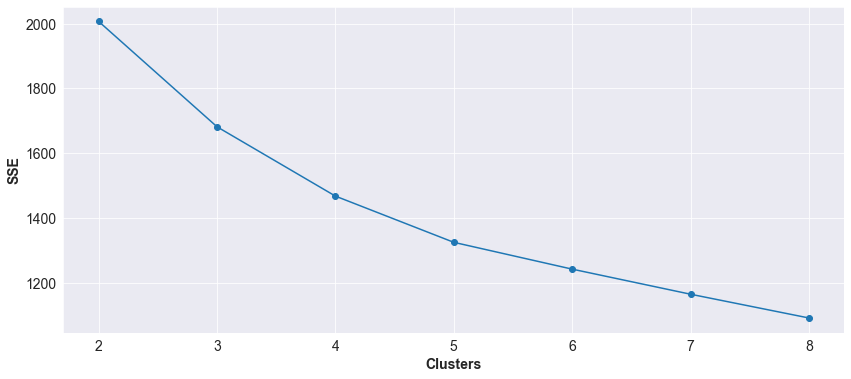

In [29]:
plt.figure(figsize=(14,6))
sns.set_style("darkgrid")
plt.plot(range(2,9),SSE,marker='o')
plt.xlabel('Clusters', fontsize=14, fontweight='bold')
plt.ylabel('SSE',fontsize=14, fontweight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [30]:
len(data_transform)

2108

In [31]:
len(SSE)

7

In [32]:
model=KMeans(n_clusters=3,random_state=40)
model.fit(data_transform)

KMeans(n_clusters=3, random_state=40)

In [33]:
prediction=model.fit_predict(data_transform)

In [34]:
copy_data['Kmean_clusters']=prediction
copy_data.head(10)

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Complain,Response,Age,Years_Since_Registration,Martial_Status,Family_Size,Total_spend_on_product,Num_Accepted_Cmp,Num_Total_Purchases,Kmean_clusters
0,1,58138.0,0,0,58,635,88,546,172,88,...,0,1,66,11,1,1,1617,1,25,2
1,1,46344.0,1,1,38,11,1,6,2,1,...,0,0,69,9,1,3,27,0,6,2
2,1,71613.0,0,0,26,426,49,127,111,21,...,0,0,58,10,2,2,776,0,21,1
3,1,26646.0,1,0,26,11,4,20,10,3,...,0,0,39,9,2,3,53,0,8,0
4,3,58293.0,1,0,94,173,43,118,46,27,...,0,0,42,9,2,3,422,0,19,0
5,2,62513.0,0,1,16,520,42,98,0,42,...,0,0,56,10,2,3,716,0,22,1
6,1,55635.0,0,1,34,235,65,164,50,49,...,0,0,52,11,1,2,590,0,21,2
7,3,33454.0,1,0,32,76,10,56,3,1,...,0,0,38,10,2,3,169,0,10,0
8,3,30351.0,1,0,19,14,0,24,3,3,...,0,1,49,10,2,3,46,1,6,0
9,3,5648.0,1,1,68,28,0,6,1,1,...,0,0,73,9,2,4,49,1,2,0


In [35]:
# input=mms.transform([[1,58138.0,0,0,58,7,0,1,66,11,1,1,1617,1,25]])
# pca_input=pca.transform(input)

In [36]:
# model.predict(pca_input)

<div style="padding:25px;color:white;margin:0;font-size:190%;text-align:center;display:fill;border-radius:10px;background-color:#298f50;overflow:hidden;font-weight:500;font-family:magra">5.2) AgglomerativeClustering</div>

In [37]:
import scipy.cluster.hierarchy as shc
#from scipy.cluster.hierarchy import dendrogram,linkage

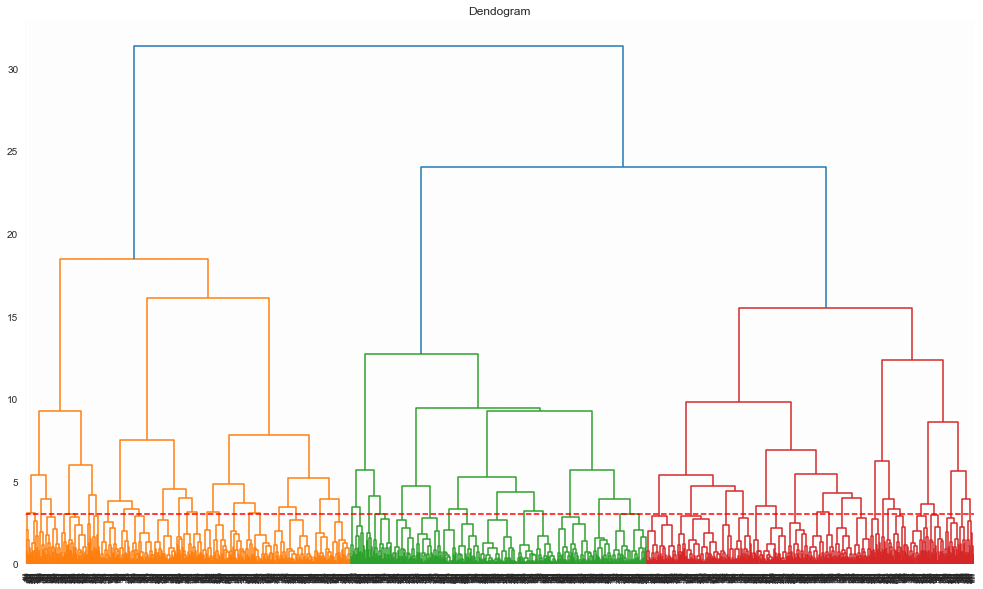

In [38]:
plt.figure(figsize=(17,10))
plt.title('Dendogram')
dend =shc.dendrogram(shc.linkage(data_transform,method='ward'))
plt.axhline(y=3,color='red',linestyle='--')
plt.show()

In [39]:
model=AgglomerativeClustering(n_clusters=3,linkage='ward')
model.fit(data_transform)
Agg_clusters=model.fit_predict(data_transform)

In [40]:
copy_data['Agg_clusters']=Agg_clusters

In [41]:
copy_data.head(15)

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Response,Age,Years_Since_Registration,Martial_Status,Family_Size,Total_spend_on_product,Num_Accepted_Cmp,Num_Total_Purchases,Kmean_clusters,Agg_clusters
0,1,58138.0,0,0,58,635,88,546,172,88,...,1,66,11,1,1,1617,1,25,2,0
1,1,46344.0,1,1,38,11,1,6,2,1,...,0,69,9,1,3,27,0,6,2,0
2,1,71613.0,0,0,26,426,49,127,111,21,...,0,58,10,2,2,776,0,21,1,1
3,1,26646.0,1,0,26,11,4,20,10,3,...,0,39,9,2,3,53,0,8,0,2
4,3,58293.0,1,0,94,173,43,118,46,27,...,0,42,9,2,3,422,0,19,0,2
5,2,62513.0,0,1,16,520,42,98,0,42,...,0,56,10,2,3,716,0,22,1,1
6,1,55635.0,0,1,34,235,65,164,50,49,...,0,52,11,1,2,590,0,21,2,0
7,3,33454.0,1,0,32,76,10,56,3,1,...,0,38,10,2,3,169,0,10,0,2
8,3,30351.0,1,0,19,14,0,24,3,3,...,1,49,10,2,3,46,1,6,0,2
9,3,5648.0,1,1,68,28,0,6,1,1,...,0,73,9,2,4,49,1,2,0,2


<div style="padding:25px;color:white;margin:0;font-size:190%;text-align:center;display:fill;border-radius:10px;background-color:#298f50;overflow:hidden;font-weight:500;font-family:magra">6) Results</div>

In [44]:
object_cols = [ 'Kidhome', 'Teenhome', 'Family_Size', 'Alone', 'Partner']
num_cols = ['Income', 'Recency', 'MntWines','Education',
            'MntFruits', 'MntMeatProducts', 'MntFishProducts',
            'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
            'NumWebPurchases', 'NumCatalogPurchases','NumStorePurchases',
            'NumWebVisitsMonth', 'Age', 'Years_Since_Registration', 'Total_spend_on_product',
            'Num_Accepted_Cmp', 'Num_Total_Purchases']

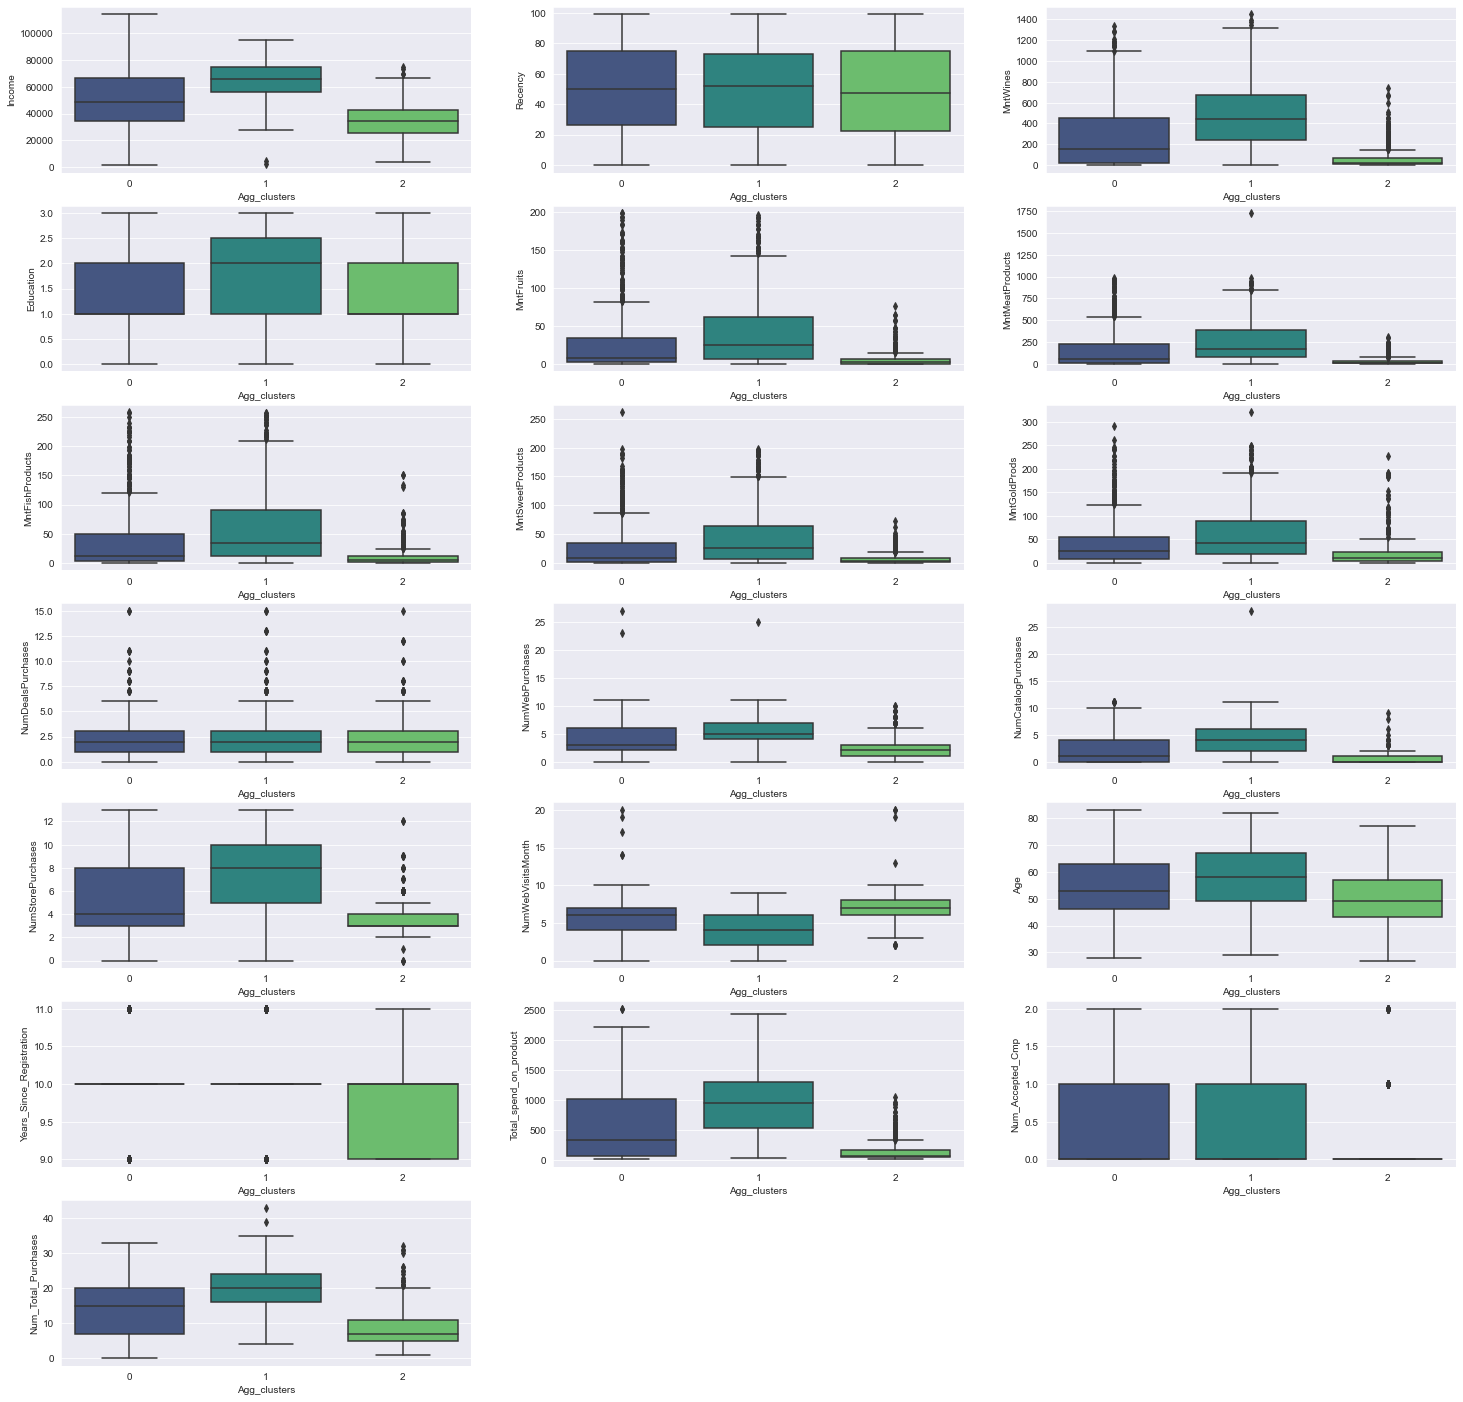

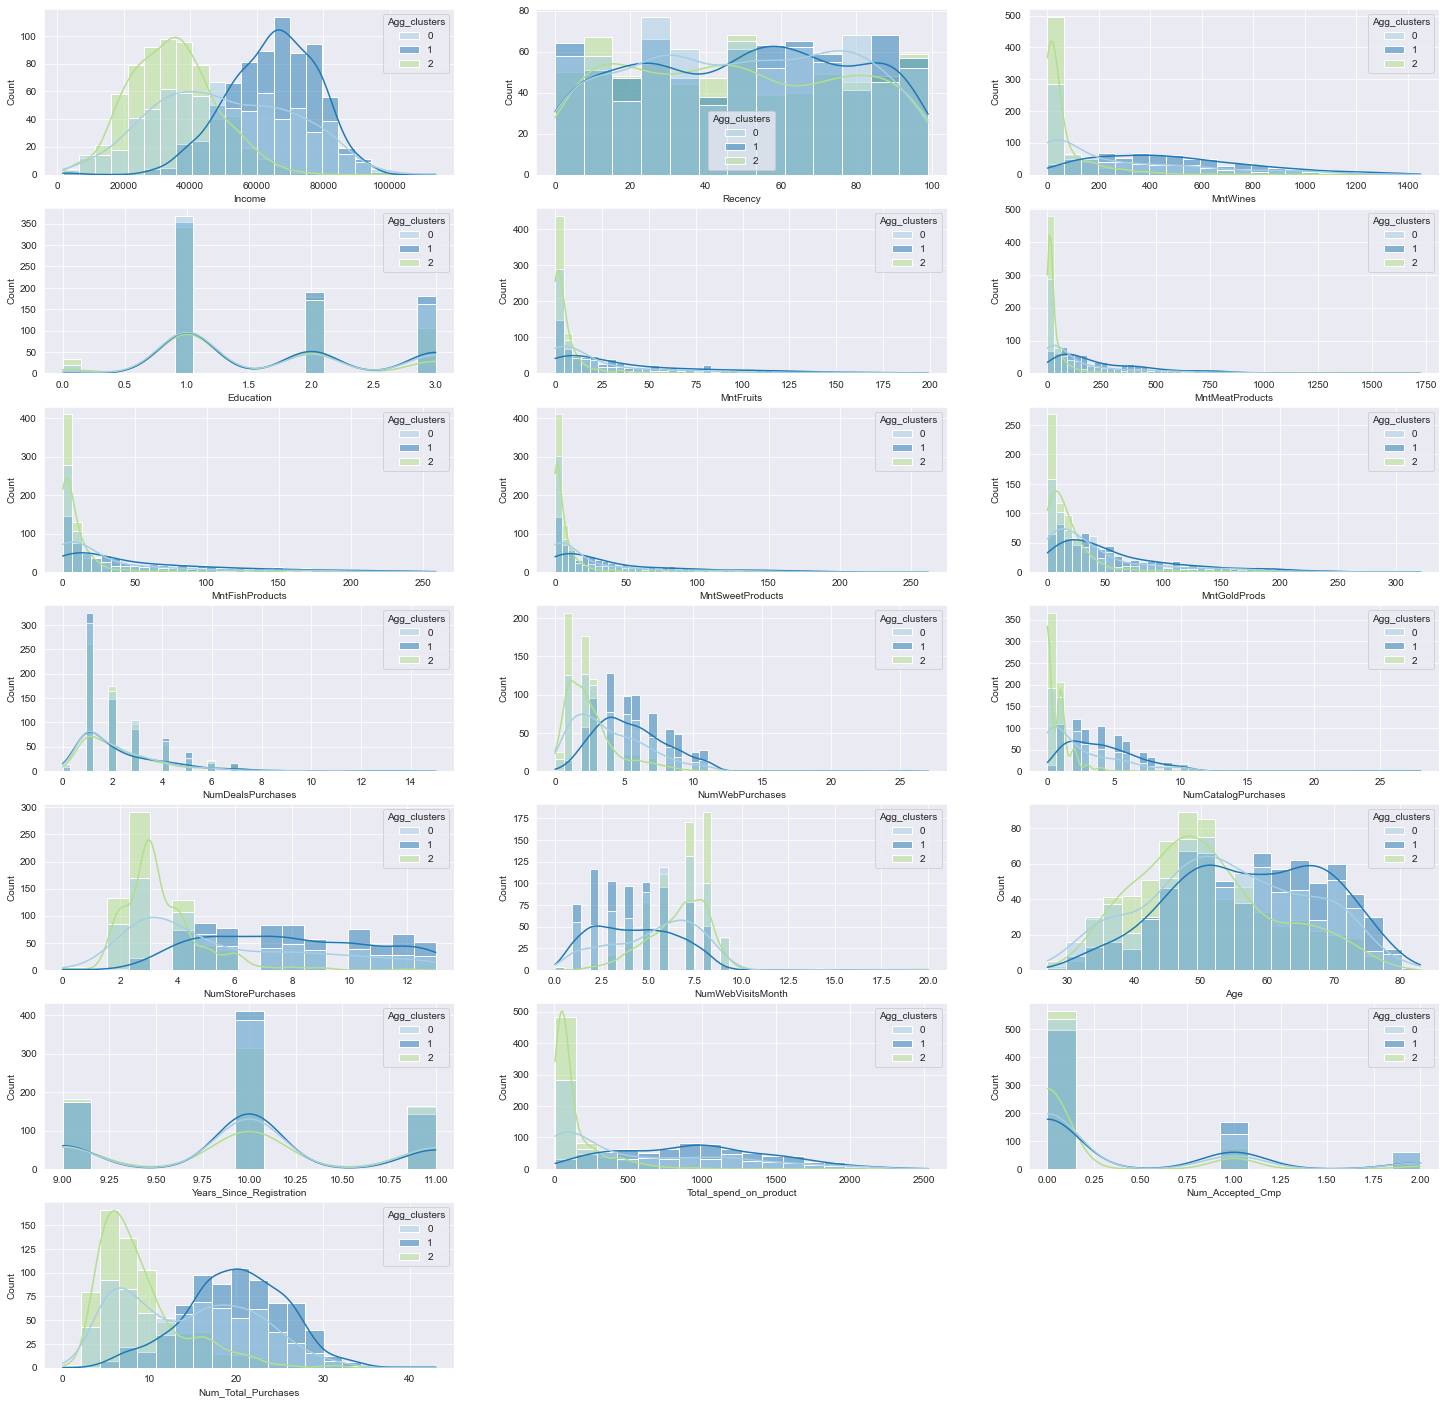

In [50]:
plt.figure(figsize=(25,25))
for i,col in enumerate(num_cols):
    plt.subplot(7,3,i+1)
    sns.boxplot(y=col,x='Agg_clusters',data=copy_data,palette='viridis')
plt.show()
plt.figure(figsize=(25,25))
for i,col in enumerate(num_cols):
    plt.subplot(7,3,i+1)
    sns.histplot(data=copy_data,x=col,hue="Agg_clusters",kde=True,
                 palette="Paired")
plt.show()    

## As a result of cluster analysis, we received three groups of buyers (clusters):
### 0 cluster:
* Middle income people (average income equals 50000)
* Average age is 52 years
* Have an education (Graduation, 2n Cycle, Master, PhD)
* Quite often buy wines, but they also often buy meat
* Most often make purchases on the web
* The average number of total purchases is 13

### 1 cluster:
* High income people (average income equals 65000)
* Average age is 58 years
* Have an education (Graduation, 2n Cycle, Master, PhD)
* Quite often buy wines, but they also often buy meat
* Most often make purchases in the stores themselves
* Most often make purchases (compared to other clusters)

### 2 cluster:
* Average income equals 35000 
* Average age is 49 years
* Have an education (Graduation, 2n Cycle, Master, PhD)
* A low number of purchases and, accordingly, spend little money on purchases 